# Reading the dataset

In [21]:
import pandas as pd
#dataset selection and importing data from the csv file
dataset = pd.read_csv('IRIS.csv')
dataset.head(3) #to learn about the dataset and features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# Checking Null Values

In [6]:
#to check for missing values
dataset.isnull().sum()
#since the null values arenot found we can move forward

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# For Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
features = dataset.columns[:-1]
dataset[features] = sc.fit_transform(dataset[features])
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa


# For Encoding

In [36]:
#Conversion of categorical data of 'species' column into numerical data by one hot encoding.
from sklearn.preprocessing import OneHotEncoder
en_data = dataset[['species']]
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()
encoded = pd.DataFrame(ar, columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
encoded.tail(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
140,0.0,0.0,1.0
141,0.0,0.0,1.0
142,0.0,0.0,1.0
143,0.0,0.0,1.0
144,0.0,0.0,1.0
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0
149,0.0,0.0,1.0


# To split the dataset into train and test set

In [64]:
from sklearn.model_selection import train_test_split
x = dataset.drop(columns = ['species'])
y = dataset['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#splits the dataset into 80% training and 20% testing, i.e test_size = 0.2 given


# To select Machine Learning Algorithm

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [65]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
#evaluation using metrics such as precision, recall, F1-score, support
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names = ohe.categories_[0]))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [61]:
#evaluation using accuracy_score
accuracy_score(y_test, y_pred) * 100

100.0

In [71]:
#calculating accuracy for training and testing sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
train_acc = accuracy_score(y_train, y_train_pred) * 100 # gives the value in percentage
test_acc = accuracy_score(y_test, y_test_pred) * 100
print(f"Training accuracy: {train_acc} ")
print(f"Testing set accuracy: {test_acc} ")

Training accuracy: 97.5 
Testing set accuracy: 100.0 


In [72]:
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Testing Set Performance:")
print(classification_report(y_test, y_test_pred))

Training Set Performance:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.95      0.96        41
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.98      0.97       120
   weighted avg       0.98      0.97      0.98       120

Testing Set Performance:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [62]:
#confusion matrix evaluation tool
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# For Visualization

In [76]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

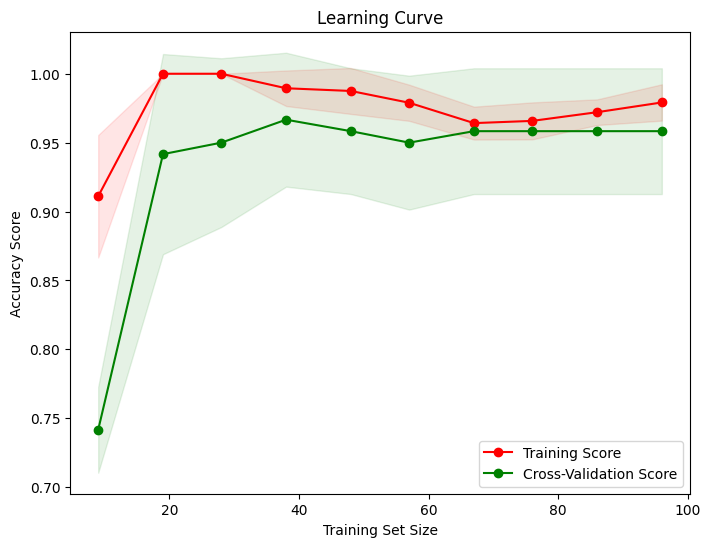

In [78]:
#to compute learning curve
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv = 5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1,1.0,10))

#to calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#for the plot of the curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-',color='r', label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

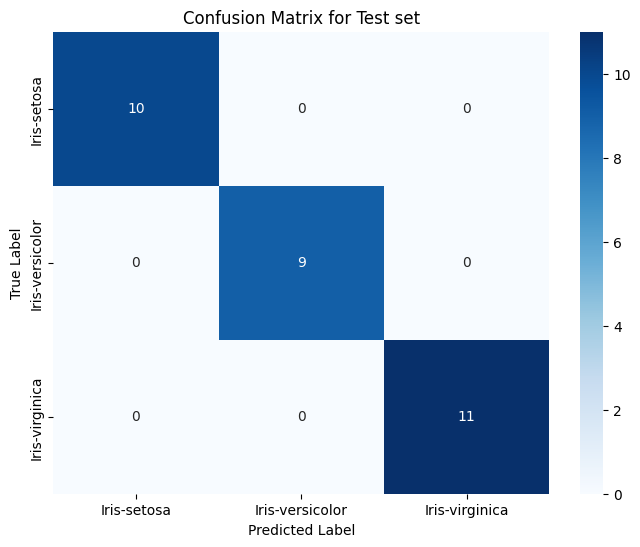

In [79]:
# for Confusion Matrix
import seaborn as sns

#to compute confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

#confusion matrix plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test set')
plt.show()

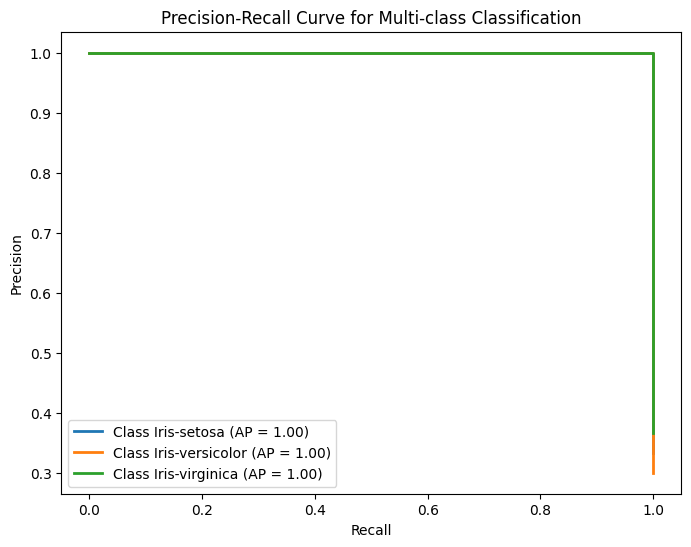

In [82]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class problems
y_test_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
n_classes = y_test_bin.shape[1]

y_score = model.decision_function(x_test)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])

    plt.plot(recall, precision, lw=2, label=f'Class {model.classes_[i]} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class Classification')
plt.legend(loc='best')
plt.show()
